In [1]:
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.10.1


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

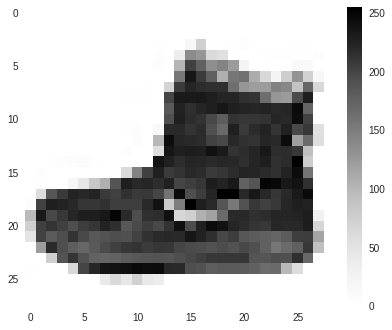

In [15]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

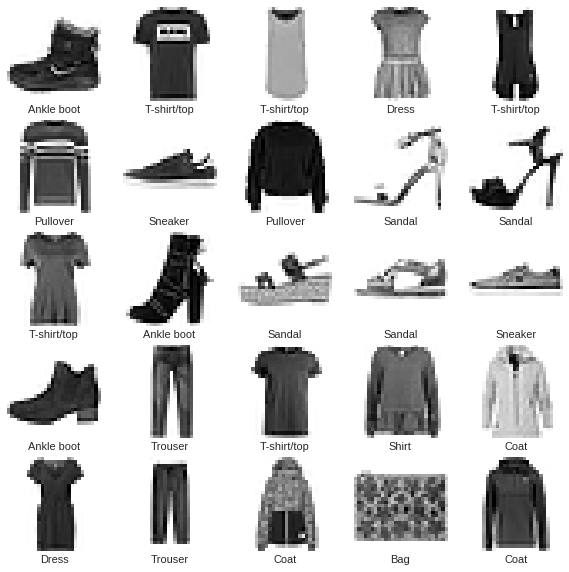

In [29]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 65us/step - loss: 1.1161 - acc: 0.6580
Epoch 2/5
60000/60000 [==============================] - 4s 63us/step - loss: 0.6556 - acc: 0.7638
Epoch 3/5
60000/60000 [==============================] - 4s 63us/step - loss: 0.5795 - acc: 0.7902
Epoch 4/5
60000/60000 [==============================] - 4s 63us/step - loss: 0.5364 - acc: 0.8075
Epoch 5/5
60000/60000 [==============================] - 4s 62us/step - loss: 0.5071 - acc: 0.8204


In [33]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 64us/step - loss: 0.4859 - acc: 0.8276
Epoch 2/5
60000/60000 [==============================] - 4s 63us/step - loss: 0.4692 - acc: 0.8345
Epoch 3/5
60000/60000 [==============================] - 4s 62us/step - loss: 0.4556 - acc: 0.8393
Epoch 4/5
60000/60000 [==============================] - 4s 63us/step - loss: 0.4448 - acc: 0.8440
Epoch 5/5
60000/60000 [==============================] - 4s 62us/step - loss: 0.4349 - acc: 0.8462


In [35]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 24us/step
('Test accuracy:', 0.8314)


In [0]:
predictions = model.predict(test_images)

In [37]:
predictions[0]

array([2.2673761e-07, 6.9622508e-09, 3.1183222e-06, 1.4728070e-06,
       7.5468975e-06, 1.6330366e-01, 1.0225997e-05, 2.7617669e-01,
       3.9867214e-03, 5.5651027e-01], dtype=float32)

In [38]:
np.argmax(predictions[0])

9

In [39]:
test_labels[0]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

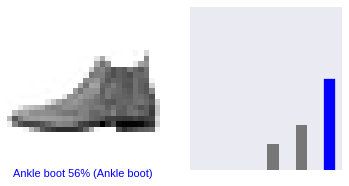

In [41]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

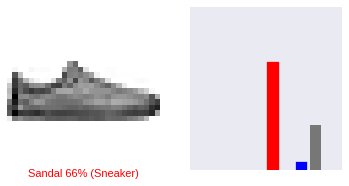

In [42]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

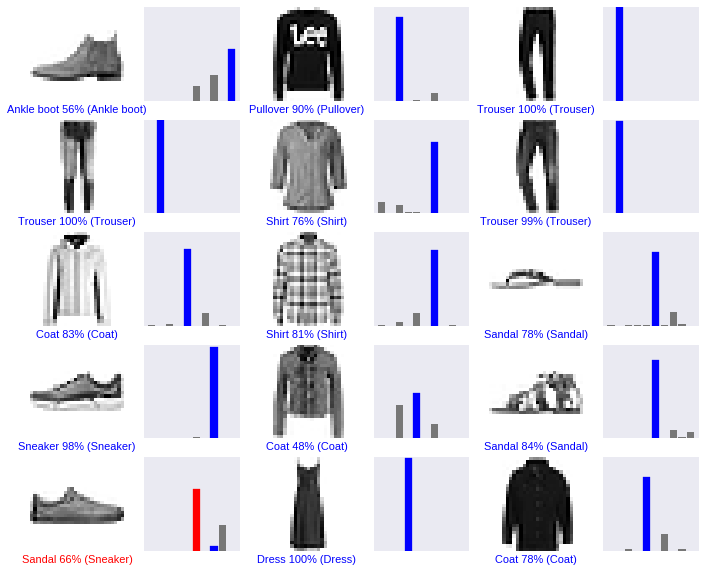

In [43]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [44]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [45]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [46]:
predictions_single = model.predict(img)

print(predictions_single)

[[2.2673788e-07 6.9622392e-09 3.1183197e-06 1.4728073e-06 7.5468988e-06
  1.6330378e-01 1.0226010e-05 2.7617657e-01 3.9867242e-03 5.5651039e-01]]


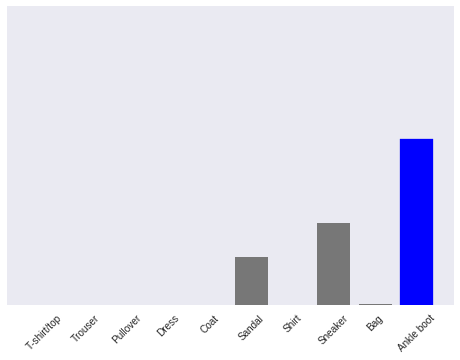

In [47]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [48]:
np.argmax(predictions_single[0])

9